In [ ]:
%cd "C:\Users\loren\Documents\COMP3608-Project"
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from HelpFunctions.metric_functions import evaluate_classification_model, plot_roc_curve


c:\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\loren\Documents\COMP3608-Project


# Machine Learning Algorithms

In [2]:
df = pd.read_csv('card_transdata.csv', index_col=0)
binary_columns = {'repeat_retailer': 'bool', 'used_chip': 'bool',
                  'used_pin_number': 'bool', 'online_order': 'bool', 'fraud': 'bool'}
df = df.astype(binary_columns)

## Train/Test split


In [3]:
X = df.drop(columns=["fraud"])
y = df["fraud"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
y_train.value_counts()

models_result = pd.DataFrame()

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 57.87785658389723 to 58.10812496080576
Data columns (total 7 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_last_transaction  1000000 non-null  float64
 1   ratio_to_median_purchase_price  1000000 non-null  float64
 2   repeat_retailer                 1000000 non-null  bool   
 3   used_chip                       1000000 non-null  bool   
 4   used_pin_number                 1000000 non-null  bool   
 5   online_order                    1000000 non-null  bool   
 6   fraud                           1000000 non-null  bool   
dtypes: bool(5), float64(2)
memory usage: 27.7 MB


In [5]:
X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800000 entries, 3.426737313631301 to 50.17837925716929
Data columns (total 6 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_last_transaction  800000 non-null  float64
 1   ratio_to_median_purchase_price  800000 non-null  float64
 2   repeat_retailer                 800000 non-null  bool   
 3   used_chip                       800000 non-null  bool   
 4   used_pin_number                 800000 non-null  bool   
 5   online_order                    800000 non-null  bool   
dtypes: bool(4), float64(2)
memory usage: 21.4 MB
<class 'pandas.core.series.Series'>
Index: 800000 entries, 3.426737313631301 to 50.17837925716929
Series name: fraud
Non-Null Count   Dtype
--------------   -----
800000 non-null  bool 
dtypes: bool(1)
memory usage: 6.9 MB


## Logistic Regression

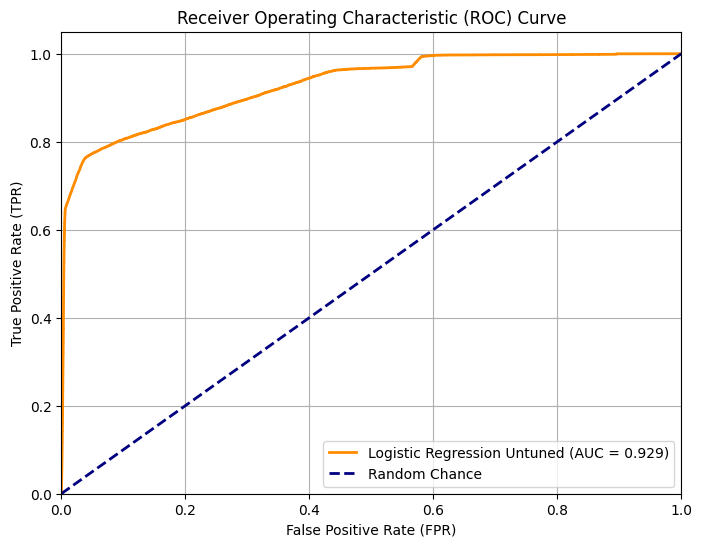

In [6]:
from DataSet3.HelpFunctions.metric_functions import evaluate_classification_model, plot_roc_curve


lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_results = evaluate_classification_model(lr, 'Logistic Regression Untuned', X_test, y_test)
models_result = pd.concat([models_result, lr_results])
models_result
plot_roc_curve(lr, X_test, y_test, 'Logistic Regression Untuned')

## Random Forest

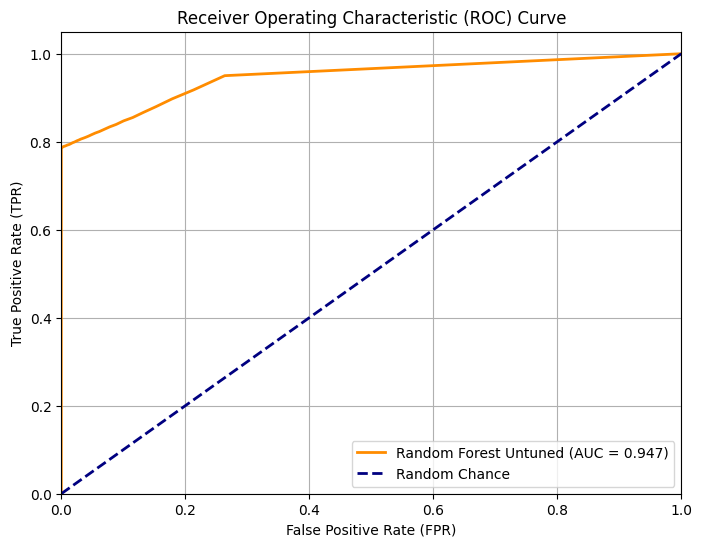

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

rf_results = evaluate_classification_model(rf, 'Random Forest Untuned', X_test, y_test)
models_result = pd.concat([models_result, rf_results])
models_result
plot_roc_curve(rf, X_test, y_test, 'Random Forest Untuned')

## Linear SVC

MATH MODEL HERE

Info: Used decision_function() for ROC AUC (SVM Untuned).
Model 'SVM Untuned' does not support predict_proba(). Cannot plot ROC curve.
Trying decision_function() instead...


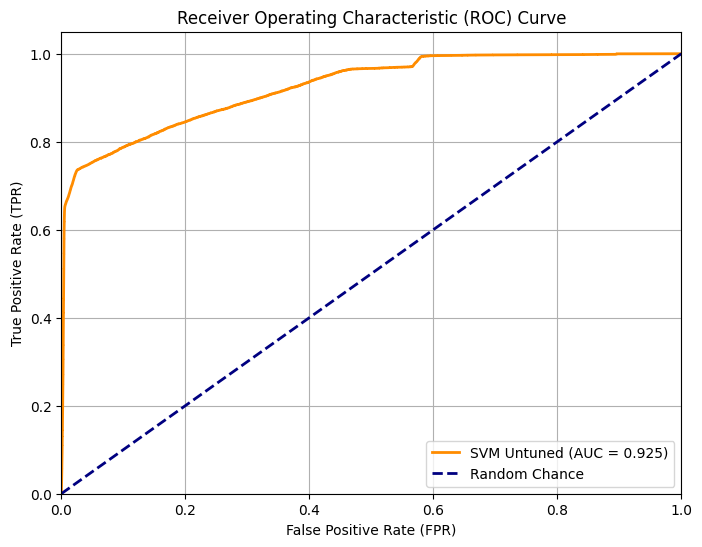

In [9]:
lsvc=LinearSVC(dual=False, random_state=42, max_iter=2000) # Increased max_iter slightly
lsvc.fit(X_train, y_train)

svm_results = evaluate_classification_model(lsvc, 'SVM Untuned', X_test, y_test)
models_result = pd.concat([models_result, svm_results])
models_result
plot_roc_curve(lsvc, X_test, y_test, 'SVM Untuned')

Since we now have a base reference point, a pipline is made to test all permutations of the the models (every model with every resampling method with scaling and no scaling). This will be futher explored in the `modelComparison` note book

In [10]:
models_result

,Model,Scaler,Sampler,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression Untuned,None,None,0.954790,0.921066,0.528002,0.671224,0.928601
0,Random Forest Untuned,None,None,0.980790,0.992347,0.786282,0.877378,0.946634
0,SVM Untuned,None,None,0.938895,0.911066,0.333448,0.488211,0.924636
